In [135]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Q1

In [163]:
# Load the dataset
file_path = 'insurance.csv'
insurance_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [165]:
# Check for missing values in the dataset
print("Missing values in each column:\n", insurance_data.isnull().sum())

Missing values in each column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [166]:
# One-hot encode the categorical variables: 'sex', 'region' and 'smoker'
insurance_encoded = pd.get_dummies(insurance_data, columns=['sex', 'smoker', 'region'], drop_first=True)


# This should handle any potential type casting issues
X = insurance_encoded[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']].astype(float)
y = insurance_encoded['charges'].astype(float)

# Split the dataset into 70% training data and 30% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Add a constant to the feature matrix (for the intercept term)
X_train = sm.add_constant(X_train)

# Train the Ordinary Least Squares (OLS) regression model using the training data
model = sm.OLS(y_train, X_train).fit()

# Report the coefficient values of the linear regression model
coefficients = model.params

# Output the coefficient values exactly as expected
print("\nCoefficient Values:")
print(coefficients.to_string())  # Use .to_string() to ensure clean formatting without index numbers



Coefficient Values:
const        -12538.439850
age             261.910617
bmi             333.360995
children        432.179293
sex_male        136.651198
smoker_yes    23618.761822


In [167]:
# Calculate and provide the standard error of the estimated coefficients
standard_errors = model.bse
standard_errors

const         1177.559475
age             14.424204
bmi             33.869953
children       166.935377
sex_male       404.314670
smoker_yes     498.185615
dtype: float64

In [168]:
# R-squared value of the model
r_squared = model.rsquared
r_squared


0.7413880155089705

In [169]:
# 95% confidence intervals.
confidence_intervals = model.conf_int()
confidence_intervals

,0,1
const,-14849.421611,-10227.458089
age,233.602855,290.218379
bmi,266.890600,399.831389
children,104.565596,759.792989
sex_male,-656.823653,930.126049
smoker_yes,22641.063545,24596.460098


<Axes: xlabel='bmi', ylabel='charges'>

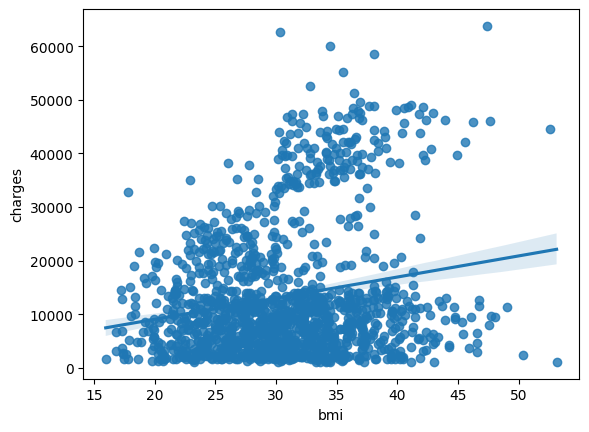

In [170]:
#relation between the BMI and charges
sns.regplot(x="bmi", y="charges", data=insurance_encoded)

## Q2

In [136]:
#import dataset insurance.csv
insurance_data = pd.read_csv('insurance.csv')

In [137]:
# select attributes age, sex, bmi, children from dataset
data_subset = insurance_data[['age', 'sex', 'bmi', 'children']]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

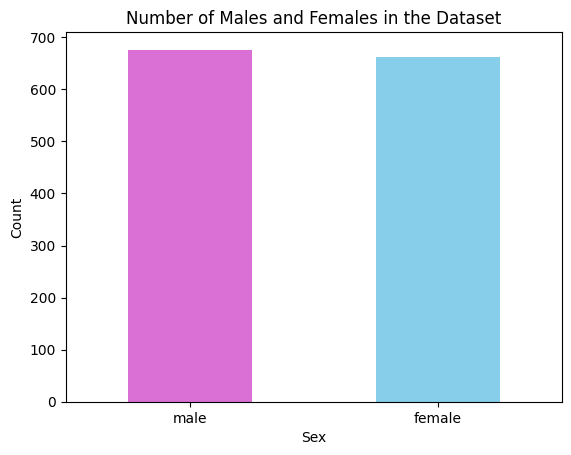

In [138]:
#bargraph to vizualise the number of males and females in the dataset
data_subset['sex'].value_counts().plot(kind='bar', color=['orchid', 'skyblue'])
plt.title("Number of Males and Females in the Dataset")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [139]:
#apply lable encoding to sex, smoker, region
insurance_data = pd.get_dummies(insurance_data, columns=['sex', 'smoker', 'region'], drop_first=True)


In [140]:
#mean, min, max of bmi
describe = data_subset['bmi'].describe()
print(describe)

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


Mean is 30.663397, min is 15.96 and max is 53.13

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

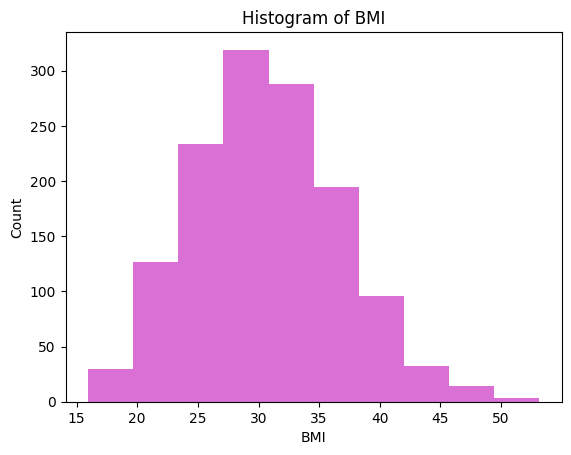

In [141]:
#histogram of bmi
data_subset['bmi'].plot(kind='hist', color=['orchid', 'skyblue'])
plt.title("Histogram of BMI")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

In [142]:
#60%training and 40%testing
X = insurance_data[['age', 'sex_male', 'bmi', 'children']]
y = insurance_data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [143]:
insurance_data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [144]:
#lasso regression

lasso_model = Lasso(alpha=0.8, max_iter=10000)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.8, max_iter=10000)

In [145]:
#lasso mse and r2


y_pred = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R²: {r2}")

MSE: 129613244.77227117
R²: 0.13101490181234055


In [146]:
#ridge regression

ridge_model = Ridge(alpha=0.8, max_iter=10000)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.8, max_iter=10000)

In [147]:
#ridge mse and r2


y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R²: {r2}")

MSE: 129613373.8535322
R²: 0.13101403639389908


With lesser MSE a higher R-squared value, lasso regression is preferred.

Since the metrics are not ideal with a really high MSE and really low R-sq, another set of lasso and ridge regression models are built below with all the variables available in the dataset to see if any improvement can be achieved.

In [148]:
# 60% training and 40% testing

X = insurance_data[['age', 'sex_male', 'bmi', 'children', 'smoker_yes', 'region_northwest', 'region_southwest', 'region_southeast']]
y = insurance_data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [149]:
lasso_model = Lasso(alpha=0.8, max_iter=10000)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.8, max_iter=10000)

In [150]:
#mse and r2


y_pred = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R²: {r2}")

MSE: 35497438.47862364
R²: 0.7620093138170061


In [151]:
#ridge regression


ridge_model = Ridge(alpha=0.8, max_iter=10000)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.8, max_iter=10000)

In [152]:
#ridge mse and r2


y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R²: {r2}")

MSE: 35546606.95495901
R²: 0.7616796663854407


There is a significant increase in the metrics when all the variables are included in the model. Lasso regression metrics are still better than ridge regresion metrics

the dataset has several correlated features like age, bmi, and children, and Lasso regression was able to identify the most important features and set the coefficients of the less important features to zero. This resulted in a slightly better performance compared to Ridge regression.

## Q3



In [153]:
#loading the dataset
insurance_data = pd.read_csv('insurance.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

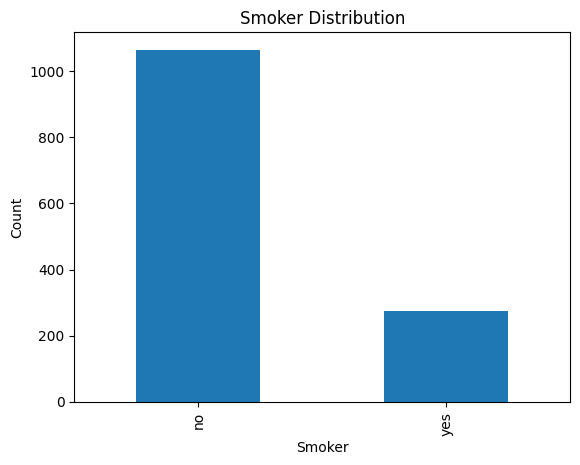

In [154]:
#smoker distribution
insurance_data['smoker'].value_counts().plot(kind='bar')
plt.title('Smoker Distribution')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

In [155]:
#head
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [156]:
#one hot encode sex and region
insurance_data = pd.get_dummies(insurance_data, columns=['sex', 'region'], drop_first=True)

In [157]:
#logistic regression to classify smoker


X = insurance_data[['age', 'sex_male', 'bmi', 'children', 'region_northwest', 'region_southwest', 'region_southeast']]
y = insurance_data['smoker']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
y_test = y_test.map({'no': 0, 'yes': 1})
y_train = y_train.map({'no': 0, 'yes': 1})

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [158]:
#coefficients of logistic regression
coefficients = logistic_model.coef_
print("Coefficients of Logistic Regression Model:")
print(coefficients)

Coefficients of Logistic Regression Model:
[[-0.00724863  0.25118466 -0.00575677  0.03829802 -0.235398   -0.18691728
  -0.0360165 ]]


In [159]:
#odds ratios for each predictor
odds_ratios = np.exp(coefficients)
print("Odds Ratios for Predictors:")
print(odds_ratios)

<IPython.core.display.Javascript object>

Odds Ratios for Predictors:
[[0.99277758 1.28554745 0.99425977 1.03904084 0.79025627 0.82951235
  0.96462438]]


In [160]:
#accuracy, precision, recall, and AUC
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= 0.3).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"Model Performance Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUC: {auc}")

Model Performance Metrics:
Accuracy: 0.8003731343283582
Precision: 0.0
Recall: 0.0
AUC: 0.5858490566037736


In [161]:
#confusion matrix
confusion_matrix(y_test, y_pred)


array([[429,   1],
       [106,   0]], dtype=int64)

In [162]:
#significance of predictors using p-values in determining smoker status

X_train_const = sm.add_constant(X_train).astype(float)  # Add constant term for intercept
logit_model = sm.Logit(y_train, X_train_const).fit()

print("\nP-values for the predictors:")
print(logit_model.pvalues)

# 8. Summary of the Logistic Regression Model
print("\nModel Summary:")
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.509826
         Iterations 5

P-values for the predictors:
const               0.067957
age                 0.243378
sex_male            0.139458
bmi                 0.712561
children            0.593568
region_northwest    0.297472
region_southwest    0.409905
region_southeast    0.837457
dtype: float64

Model Summary:
                           Logit Regression Results                           
Dep. Variable:                 smoker   No. Observations:                  802
Model:                          Logit   Df Residuals:                      794
Method:                           MLE   Df Model:                            7
Date:                Wed, 02 Oct 2024   Pseudo R-squ.:                0.006695
Time:                        22:12:26   Log-Likelihood:                -408.88
converged:                       True   LL-Null:                       -411.64
Covariance Type:            nonrobust   LLR p-value: